In [7]:
%matplotlib inline
import d2lzh as d2l
from mxnet import nd

features, labels = d2l.get_data_ch7()

def init_adadelta_states():
    s_w, s_b = nd.zeros((features.shape[1], 1)), nd.zeros(1)
    delta_w, delta_b = nd.zeros((features.shape[1], 1)), nd.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        s[:] = rho * s + (1 - rho) * p.grad.square()
        g = ((delta + eps).sqrt() / (s + eps).sqrt()) * p.grad
        p[:] -= g
        delta[:] = rho * delta + (1 - rho) * g * g

loss: 0.243870, 0.243350 sec per epoch


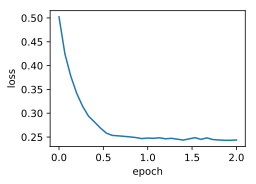

In [8]:
d2l.train_ch7(adadelta, init_adadelta_states(), {'rho': 0.9}, features,
              labels)